In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv("/content/Transactions_2021-2023 (1).csv")

In [14]:
df.head(20)

,Date,Name / Description,Expense/Income,Amount (EUR),Transaction vs category,Transaction,Category
0,2021-06-19,Grocery,Expense,68.58,NaN,NaN,NaN
1,2021-07-20,Utilities,Income,838.08,NaN,NaN,NaN
2,2021-09-25,Fuel,Income,539.19,NaN,NaN,NaN
3,2021-10-19,Fuel,Income,736.23,NaN,NaN,NaN
4,2021-02-10,Grocery,Expense,549.87,NaN,NaN,NaN
5,2021-02-09,Utilities,Expense,441.79,NaN,NaN,NaN
6,2021-09-14,Subscription,Income,846.48,NaN,NaN,NaN
7,2021-08-21,Fuel,Expense,274.66,NaN,NaN,NaN
8,2021-04-11,Utilities,Income,796.96,NaN,NaN,NaN
9,2021-09-23,Fuel,Expense,98.03,NaN,NaN,NaN


In [15]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Amount (EUR)', 'Expense/Income'])
df['Amount (EUR)'] = pd.to_numeric(df['Amount (EUR)'], errors='coerce')

In [16]:
expenses = df[df['Expense/Income'] == 'Expense']
income = df[df['Expense/Income'] == 'Income']

In [17]:
expenses

,Date,Name / Description,Expense/Income,Amount (EUR),Transaction vs category,Transaction,Category
0,2021-06-19,Grocery,Expense,68.58,NaN,NaN,NaN
4,2021-02-10,Grocery,Expense,549.87,NaN,NaN,NaN
5,2021-02-09,Utilities,Expense,441.79,NaN,NaN,NaN
7,2021-08-21,Fuel,Expense,274.66,NaN,NaN,NaN
9,2021-09-23,Fuel,Expense,98.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...
289,2023-08-14,Grocery,Expense,560.11,NaN,NaN,NaN
290,2023-11-29,Grocery,Expense,727.26,NaN,NaN,NaN
294,2023-12-06,Salary,Expense,753.53,NaN,NaN,NaN
295,2023-05-12,Utilities,Expense,606.01,NaN,NaN,NaN


In [18]:
expense_categories = expenses.groupby('Name / Description')['Amount (EUR)'].sum()
income_categories = income.groupby('Name / Description')['Amount (EUR)'].sum()

In [19]:
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
df['Year'] = df['Date'].dt.year
monthly_summary = df.groupby(['YearMonth', 'Expense/Income'])['Amount (EUR)'].sum().unstack().fillna(0)
yearly_summary = df.groupby(['Year', 'Expense/Income'])['Amount (EUR)'].sum().unstack().fillna(0)

In [20]:
monthly_summary

Expense/Income,Expense,Income
YearMonth,,
2021-01,2067.93,2989.31
2021-02,1815.70,1710.16
2021-03,1204.39,2037.96
2021-04,2095.93,3388.83
2021-05,2597.08,971.21
2021-06,2152.73,2142.96
2021-07,1621.98,2980.90
2021-08,1617.49,1599.28
2021-09,669.10,4010.51


In [21]:
top_expense_category = expense_categories.idxmax()
top_expense_amount = expense_categories.max()

In [22]:
top_expense_category

'Insurance'

In [23]:
top_expense_amount

15221.61

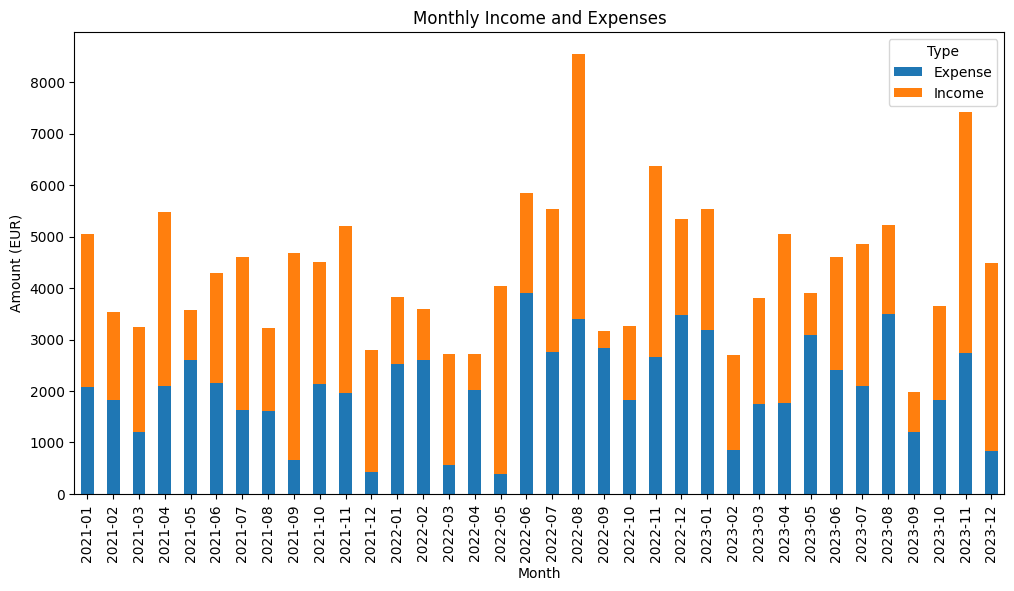

In [24]:
monthly_summary.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Income and Expenses')
plt.xlabel('Month')
plt.ylabel('Amount (EUR)')
plt.legend(title='Type')
plt.show()

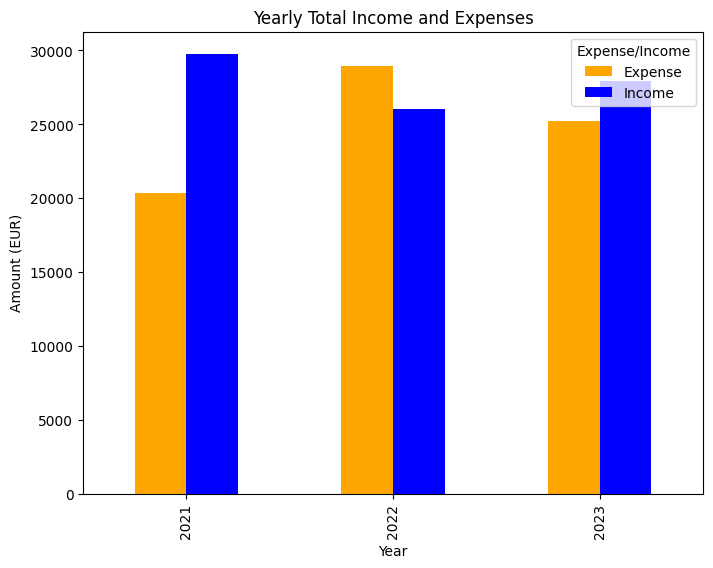

In [25]:
yearly_summary.plot(kind='bar', color=['orange', 'blue'], figsize=(8, 6))
plt.title('Yearly Total Income and Expenses')
plt.xlabel('Year')
plt.ylabel('Amount (EUR)')
plt.show()

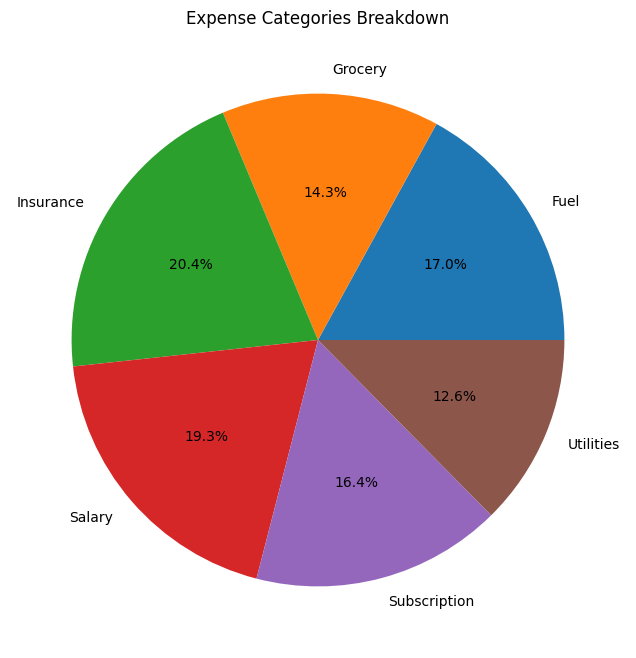

In [26]:
expense_categories.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Expense Categories Breakdown')
plt.ylabel('')
plt.show()

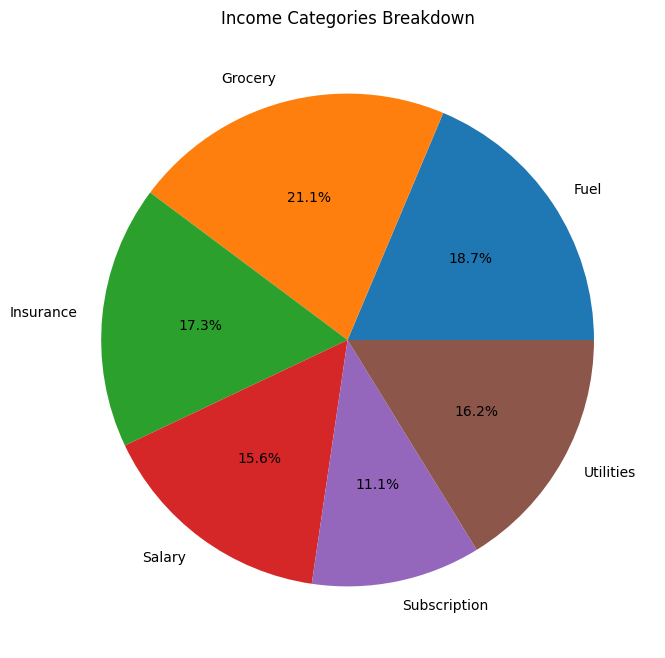

In [27]:
income_categories.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Income Categories Breakdown')
plt.ylabel('')
plt.show()

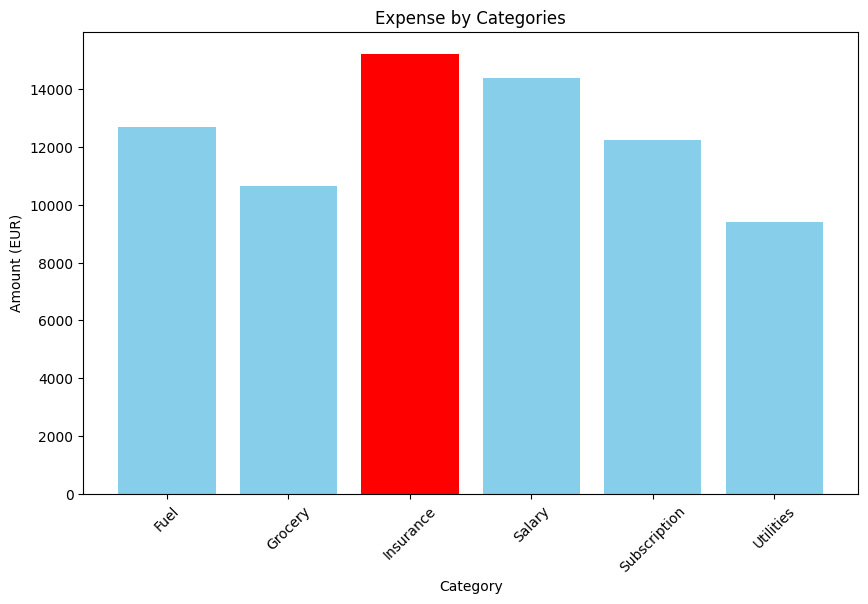

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(expense_categories.index, expense_categories.values, color='skyblue')
plt.title('Expense by Categories')
plt.xlabel('Category')
plt.ylabel('Amount (EUR)')
plt.xticks(rotation=45)
plt.bar(top_expense_category, top_expense_amount, color='red')
plt.show()


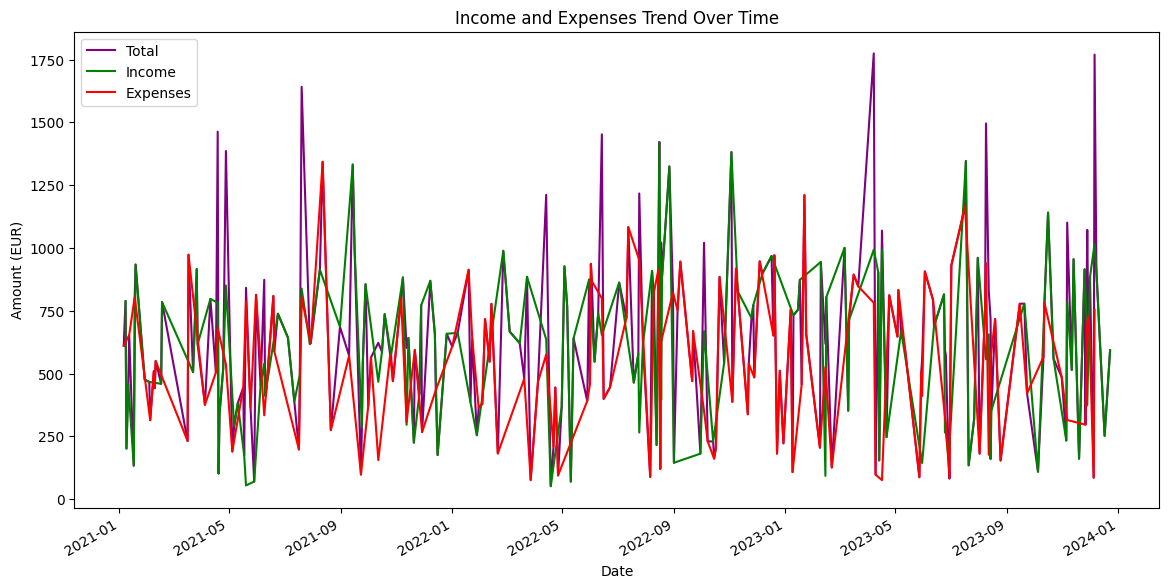

In [29]:
plt.figure(figsize=(14, 7))
df.groupby('Date')['Amount (EUR)'].sum().plot(ax=plt.gca(), label='Total', color='purple')
income.groupby('Date')['Amount (EUR)'].sum().plot(ax=plt.gca(), label='Income', color='green')
expenses.groupby('Date')['Amount (EUR)'].sum().plot(ax=plt.gca(), label='Expenses', color='red')
plt.title('Income and Expenses Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Amount (EUR)')
plt.legend()
plt.show()


In [30]:
!pip install transformers accelerate pypdf langchain langchain_community bitsandbytes faiss-gpu huggingface_hub sentence-transformers

In [31]:
import transformers
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig, BitsAndBytesConfig
import torch
from langchain.llms import HuggingFacePipeline

from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import HuggingFaceHub
from langchain.vectorstores import Chroma
from langchain.chains import ConversationalRetrievalChain

In [32]:
origin_model_path = "mistralai/Mistral-7B-Instruct-v0.1"
model_path = "filipealmeida/Mistral-7B-Instruct-v0.1-sharded"
bnb_config = BitsAndBytesConfig \
              (
                load_in_4bit=True,
                bnb_4bit_use_double_quant=True,
                bnb_4bit_quant_type="nf4",
                bnb_4bit_compute_dtype=torch.bfloat16,
              )
model = AutoModelForCausalLM.from_pretrained (model_path, trust_remote_code=True,
                                              quantization_config=bnb_config,
                                              device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(origin_model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [33]:
text_generation_pipeline = transformers.pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=300,
    temperature = 0.3,
    do_sample=True,
)
mistral_llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

In [34]:
from langchain_community.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(file_path='/content/Transactions_2021-2023 (1).csv')
data = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
chunked_docs  = text_splitter.split_documents(data)
embeddings = HuggingFaceEmbeddings()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [35]:
from langchain.vectorstores import FAISS
db = FAISS.from_documents(chunked_docs,
                          HuggingFaceEmbeddings(model_name='sentence-transformers/all-mpnet-base-v2'))
retriever = db.as_retriever(
    search_type="similarity",
    search_kwargs={'k': 4}
)

In [36]:
qa_chain = ConversationalRetrievalChain.from_llm(mistral_llm, retriever,return_source_documents=True)

In [39]:
import sys
chat_history = []
query = input('Simple CSV Questions: ')
result = qa_chain.invoke({'question': query, 'chat_history': chat_history})
print('Answer: ' + result['answer'] + '\n')
chat_history.append((query, result['answer']))

Simple CSV Questions: n Which Year did i spend most money , is it 2021,2022 or 2023?
Answer:  To determine which year you spent the most money on fuel, we need to compare the total amount spent on fuel for each year. Based on the given transactions, the total amount spent on fuel in 2022 was €980.86, in 2023 was €735.68 and in 2021 was not provided. Therefore, you spent the most money on fuel in 2022.

